In [58]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("dataset_crudo.csv")

# Eliminar columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

#redondear las columnas numéricas 
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].round(2)
# Mostrar las nuevas columnas

# Limpiar 'Kilómetros': quitar ' km', puntos y convertir a float
df['Kilómetros'] = df['Kilómetros'].astype(str).str.replace('.', '', regex=False)
df['Kilómetros'] = df['Kilómetros'].str.replace(' km', '', regex=False)
df['Kilómetros'] = pd.to_numeric(df['Kilómetros'], errors='coerce')

In [59]:
# Primero normalizamos los valores de moneda
df['Moneda'] = df['Moneda'].replace({'$': 'peso', 'U$S': 'dolar'})

# Tasa de conversión
PESO_A_DOLAR = 1165

# Crear nueva columna con el precio en dólares
df['Precio_usd'] = df.apply(
    lambda row: row['Precio'] / PESO_A_DOLAR if row['Moneda'] == 'peso' else row['Precio'],
    axis=1
)

# Eliminar las columnas originales de 'Precio' y 'Moneda'
df = df.drop(columns=['Precio', 'Moneda'])

# Mostrar las primeras filas para verificar
df.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd
0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,"Descubre nuestro impresionante Ford Eco Sport del año 2020, en color Blanco.Este Ford es confiable, brinda una combinación perfecta de estilo, rendimiento y versatilidad. Con solo 64000 km, este vehículo está listo para superar cualquier desafío que se le presente.En nuestra agencia, nos enorgullece ofrecer una amplia gama de vehículos multimarca, y el Ford Eco Sport es una de nuestras opciones destacadas. Nuestro equipo de expertos estará encantado de brindarte toda la información que necesites sobre este modelo y ayudarte a encontrar el vehículo perfecto que se ajuste a tus necesidades y preferencias.Este Ford Eco Sport se encuentra en excelente estado y está listo para rodar y transferir. Ofrece un gran valor por su precio, y su robustez y durabilidad son características emblemáticas de la marca, asegurando una inversión a largo plazo.No pierdas esta oportunidad de tener el vehículo perfecto para tus necesidades. Ven a visitarnos y descubre todo lo que el Ford Eco Sport 2020 tiene para ofrecerte.Ofrecemos opciones de toma en parte de pago como permuta y consignación para asegurarnos de que tu próxima compra sea más fácil y placentera.",concesionaria,17596.566524
1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswagen“CONCESIONARIO LIDER EN VENTAS A NIVEL NACIONAL”Realizamos operaciones:Contado Efectivo (Cotizamos dólar al dia).Financiación con Anticipo y Cuotas fijas en pesos (SOLO DNI).Permuta (Tasamos mejor tu usado).Amplio Stock Físico – Entrega Inmediata – Venta a TODO el País.,tienda,48068.583691
2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERVICIOS AL DIA-TRES FILAS DE ASIENTOS-CUATRO CUBIERTAS NUEVAS-PODRIA TOMAR PERMUTA MENOR/MAYOR VALOR-COORDINAR VISITA,particular,28300.000000
3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas buscando. Con más de 50 años de trayectoria que nos avalan y un stock de más de 600 vehículos exclusivamente seleccionados para vos, encontrar tu auto soñado nunca fue tan sencillo.BENEFICIOS DE COMPRAR EN GRUPO RANDAZZO:FINANCIACION: Tenemos la mejor financiación del mercado. Consulta las tasas disponibles: con un ingreso mínimo y cuotas, acceder a tu auto soñado hoy está más cerca que nunca.GESTORIA: Compra y disfruta de tu tiempo que nosotros nos encargamos de toda la gestoría para que la compra de tu auto sea tan simple como manejarlo.DEJÁ TU AUTO COMO PARTE DE PAGO: Cambia tu auto por uno de calidad certificada Randazzo con cobertura mecánica. Con nuestro plan de llave contra llave, nunca te quedes sin vehículo: el tuyo lo entregas cuando te llevas el nuevo. Deja tu auto con tranquilidad que todos los autos los transferimos a nuestro nombre.INSPECCIÓN Y COBERTURA MECÁNICA: Nuestros autos son mucho más que autos usados, son autos exclusivamente seleccionados que están chequeados en 280 puntos por nuestra postventa oficial (Chevrolet, Renault, Fiat) certificada, tienen todos los servicios al día, kilometraje real y Cobertura Mecánica Grupo Randazzo de 3 meses.SEGURO: Si contratas el seguro con nosotros podés tener hasta dos meses de seguro bonificado.RECIBÍ EL AUTO EN TU CASA: Tenemos el servicio de entregarte el auto en tu domicilio, consulta el costo.",tienda,17244.635193
4,Jeep,Compass,2021.0,2.4 Sport At,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,"•U

In [60]:
mapeo_marcas = {
    'Rrenault': 'Renault',
    'hiunday': 'Hyundai',
    'Hiunday': 'Hyundai',
    'Hiuanday': 'Hyundai',
    'D-S': 'DS',
    'DS AUTOMOBILES': 'DS',
    'Land Rover': 'LandRover',
    'Range Rover': 'LandRover',
    'D.S': 'DS',
    'D·S': 'DS',
    'D.S.' : 'DS',
    'Vol': 'Volkswagen'
}
df['Marca'] = df['Marca'].str.strip().replace(mapeo_marcas)

def one_hot_encode_marca(df):
    dummies = pd.get_dummies(df['Marca'], prefix='Marca', drop_first=False, dtype=int)
    df = pd.concat([df.drop(columns=['Marca']), dummies], axis=1)
    return df

df = one_hot_encode_marca(df)
pd.set_option('display.max_columns', None)
# Mostrar las primeras filas para verificar
df.head(100)


,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo
0,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,"Descubre nuestro impresionante Ford Eco Sport del año 2020, en color Blanco.Este Ford es confiable, brinda una combinación perfecta de estilo, rendimiento y versatilidad. Con solo 64000 km, este vehículo está listo para superar cualquier desafío que se le presente.En nuestra agencia, nos enorgullece ofrecer una amplia gama de vehículos multimarca, y el Ford Eco Sport es una de nuestras opciones destacadas. Nuestro equipo de expertos estará encantado de brindarte toda la información que necesites sobre este modelo y ayudarte a encontrar el vehículo perfecto que se ajuste a tus necesidades y preferencias.Este Ford Eco Sport se encuentra en excelente estado y está listo para rodar y transferir. Ofrece un gran valor por su precio, y su robustez y durabilidad son características emblemáticas de la marca, asegurando una inversión a largo plazo.No pierdas esta oportunidad de tener el vehículo perfecto para tus necesidades. Ven a visitarnos y descubre todo lo que el Ford Eco Sport 2020 tiene para ofrecerte.Ofrecemos opciones de toma en parte de pago como permuta y consignación para asegurarnos de que tu próxima compra sea más fácil y placentera.",concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswagen“CONCESIONARIO LIDER EN VENTAS A NIVEL NACIONAL”Realizamos operaciones:Contado Efectivo (Cotizamos dólar al dia).Financiación con Anticipo y Cuotas fijas en pesos (SOLO DNI).Permuta (Tasamos mejor tu usado).Amplio Stock Físico – Entrega Inmediata – Venta a TODO el País.,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERVICIOS AL DIA-TRES FILAS DE ASIENTOS-CUATRO CUBIERTAS NUEVAS-PODRIA TOMAR PERMUTA MENOR/MAYOR VALOR-COORDINAR VISITA,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas buscando. Con más de 50 años de trayectoria que nos avalan y un stock de más de 600 vehículos exclusivamente seleccionados para vos, encontrar tu auto soñado nunca fue tan sencillo.BENEFICIOS DE COMPRAR EN GRUPO RANDAZZO:FINANCIACION: Tenemos la mejor financiación del mercado. Consulta las tasas disponibles: con un ingreso mínimo y cuotas, acceder a tu auto soñado hoy está más cerca que nunca.GESTORIA: Compra y disfruta de tu tiempo que nosotros nos encargamos de toda la gestoría para que la compra de tu auto sea tan simple como manejarlo.DEJÁ TU AUTO COMO PARTE DE PAGO: Cambia tu auto por uno de calidad certificada Randazzo con cobertura mecánica. Con nuestro plan de llave contra llave, nunca te quedes sin vehículo: el tuyo lo entregas cuando te llevas el nuevo. Deja tu auto con

In [61]:
import re
#traccion
def extraer_traccion(version):
    version = str(version).upper()

    if "4X4" in version:
        return "4x4"
    elif "4X2" in version:
        return "4x2"
    elif "AWD" in version:
        return "AWD"
    elif "FWD" in version:
        return "FWD"
    elif "RWD" in version:
        return "RWD"
    elif "4M" in version:
        return "4M"
    elif "2WD" in version:
        return "2WD"
    else:
        return "Desconocida"

def agregar_columna_traccion(df):
    df['Traccion'] = df['Versión'].apply(extraer_traccion)
    df = df.drop(columns=['Versión'])
    return df

df = agregar_columna_traccion(df)


df = pd.get_dummies(df, columns=['Traccion'], prefix='Traccion', dtype=int)
df.head()


df.head()

,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD
0,Ecosport,2020.0,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,"Descubre nuestro impresionante Ford Eco Sport del año 2020, en color Blanco.Este Ford es confiable, brinda una combinación perfecta de estilo, rendimiento y versatilidad. Con solo 64000 km, este vehículo está listo para superar cualquier desafío que se le presente.En nuestra agencia, nos enorgullece ofrecer una amplia gama de vehículos multimarca, y el Ford Eco Sport es una de nuestras opciones destacadas. Nuestro equipo de expertos estará encantado de brindarte toda la información que necesites sobre este modelo y ayudarte a encontrar el vehículo perfecto que se ajuste a tus necesidades y preferencias.Este Ford Eco Sport se encuentra en excelente estado y está listo para rodar y transferir. Ofrece un gran valor por su precio, y su robustez y durabilidad son características emblemáticas de la marca, asegurando una inversión a largo plazo.No pierdas esta oportunidad de tener el vehículo perfecto para tus necesidades. Ven a visitarnos y descubre todo lo que el Ford Eco Sport 2020 tiene para ofrecerte.Ofrecemos opciones de toma en parte de pago como permuta y consignación para asegurarnos de que tu próxima compra sea más fácil y placentera.",concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Tiguan,2024.0,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswagen“CONCESIONARIO LIDER EN VENTAS A NIVEL NACIONAL”Realizamos operaciones:Contado Efectivo (Cotizamos dólar al dia).Financiación con Anticipo y Cuotas fijas en pesos (SOLO DNI).Permuta (Tasamos mejor tu usado).Amplio Stock Físico – Entrega Inmediata – Venta a TODO el País.,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,Tiguan Allspace,2019.0,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERVICIOS AL DIA-TRES FILAS DE ASIENTOS-CUATRO CUBIERTAS NUEVAS-PODRIA TOMAR PERMUTA MENOR/MAYOR VALOR-COORDINAR VISITA,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,Ecosport,2017.0,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas buscando. Con más de 50 años de trayectoria que nos avalan y un stock de más de 600 vehículos exclusivamente seleccionados para vos, encontrar tu auto soñado nunca fue tan sencillo.BENEFICIOS DE COMPRAR EN GRUPO RANDAZZO:FINANCIACION: Tenemos la mejor financiación del mercado. Consulta las tasas disponibles: con un ingreso mínimo y cuotas, acceder a tu auto soñado hoy está más cerca que nunca.GESTORIA: Compra y disfruta de tu tiempo que nosotros nos encargamos de toda la gestoría para que la compra de tu auto sea tan simple como manejarlo.DEJÁ TU AUTO COMO PARTE DE PAGO: Cambia tu auto por uno de calidad certificada Randazzo con cobertura mecánica. Con nuestro plan de llave contra llave, nunca te quedes sin vehículo: el tuyo lo entregas cu

In [62]:
# color
def agrupar_color(color):
    if pd.isna(color):
        return 'Desconocido'

    color = str(color).lower().strip()

    if any(x in color for x in ['gris', 'plata', 'plateado']):
        return 'Gris'
    elif any(x in color for x in ['blanco', 'blanca']):
        return 'Blanco'
    elif any(x in color for x in ['negro', 'negra', 'black', 'noir']):
        return 'Negro'
    else:
        return 'Color'
    

df['Color_grupo'] = df['Color'].apply(agrupar_color)

#contar la cantidad de cada color 
conteo_colores = df['Color_grupo'].value_counts()
print(conteo_colores)


df = pd.get_dummies(df, columns=['Color_grupo'], prefix='Color', dtype=int)
df = df.drop(columns=['Color'])
df.head()

Color_grupo
Gris           6961
Blanco         4824
Color          3245
Negro          2835
Desconocido     389
Name: count, dtype: int64


,Modelo,Año,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro
0,Ecosport,2020.0,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,"Descubre nuestro impresionante Ford Eco Sport del año 2020, en color Blanco.Este Ford es confiable, brinda una combinación perfecta de estilo, rendimiento y versatilidad. Con solo 64000 km, este vehículo está listo para superar cualquier desafío que se le presente.En nuestra agencia, nos enorgullece ofrecer una amplia gama de vehículos multimarca, y el Ford Eco Sport es una de nuestras opciones destacadas. Nuestro equipo de expertos estará encantado de brindarte toda la información que necesites sobre este modelo y ayudarte a encontrar el vehículo perfecto que se ajuste a tus necesidades y preferencias.Este Ford Eco Sport se encuentra en excelente estado y está listo para rodar y transferir. Ofrece un gran valor por su precio, y su robustez y durabilidad son características emblemáticas de la marca, asegurando una inversión a largo plazo.No pierdas esta oportunidad de tener el vehículo perfecto para tus necesidades. Ven a visitarnos y descubre todo lo que el Ford Eco Sport 2020 tiene para ofrecerte.Ofrecemos opciones de toma en parte de pago como permuta y consignación para asegurarnos de que tu próxima compra sea más fácil y placentera.",concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,Tiguan,2024.0,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswagen“CONCESIONARIO LIDER EN VENTAS A NIVEL NACIONAL”Realizamos operaciones:Contado Efectivo (Cotizamos dólar al dia).Financiación con Anticipo y Cuotas fijas en pesos (SOLO DNI).Permuta (Tasamos mejor tu usado).Amplio Stock Físico – Entrega Inmediata – Venta a TODO el País.,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,Tiguan Allspace,2019.0,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERVICIOS AL DIA-TRES FILAS DE ASIENTOS-CUATRO CUBIERTAS NUEVAS-PODRIA TOMAR PERMUTA MENOR/MAYOR VALOR-COORDINAR VISITA,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,Ecosport,2017.0,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas buscando. Con más de 50 años de trayectoria que nos avalan y un stock de más de 600 vehículos exclusivamente seleccionados para vos, encontrar tu auto soñado nunca fue tan sencillo.BENEFICIOS DE COMPRAR EN GRUPO RANDAZZO:FINANCIACION: Tenemos la mejor financiación del mercado. Consulta las tasas disponibles: con un ingreso mínimo y cuotas, acceder a tu auto soñado hoy está más cerca que nunca.GESTORIA: Compra y disfruta de tu tiempo que nosotros nos encargamos de toda la gestoría para que la compra de tu auto sea tan simple como manejarlo.DEJÁ TU AUTO COMO PARTE DE PAGO: Cambia tu auto por uno de calidad certificada Randazzo con cobertura mecánica. Con nuestro plan de llave co

In [63]:
#modelos
# 1. Top 20 modelos más comunes
top_modelos = df['Modelo'].value_counts().nlargest(20).index

# 2. Normalizar modelo (top 20 vs. Otro)
df['Modelo_normalizado'] = df['Modelo'].apply(lambda x: x if x in top_modelos else 'Otro')
df = df.drop('Modelo', axis=1)

# 3. One-hot encoding
df = pd.get_dummies(df, columns=['Modelo_normalizado'], prefix='Modelo', dtype=int)

df.head()

,Año,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1
0,2020.0,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,"Descubre nuestro impresionante Ford Eco Sport del año 2020, en color Blanco.Este Ford es confiable, brinda una combinación perfecta de estilo, rendimiento y versatilidad. Con solo 64000 km, este vehículo está listo para superar cualquier desafío que se le presente.En nuestra agencia, nos enorgullece ofrecer una amplia gama de vehículos multimarca, y el Ford Eco Sport es una de nuestras opciones destacadas. Nuestro equipo de expertos estará encantado de brindarte toda la información que necesites sobre este modelo y ayudarte a encontrar el vehículo perfecto que se ajuste a tus necesidades y preferencias.Este Ford Eco Sport se encuentra en excelente estado y está listo para rodar y transferir. Ofrece un gran valor por su precio, y su robustez y durabilidad son características emblemáticas de la marca, asegurando una inversión a largo plazo.No pierdas esta oportunidad de tener el vehículo perfecto para tus necesidades. Ven a visitarnos y descubre todo lo que el Ford Eco Sport 2020 tiene para ofrecerte.Ofrecemos opciones de toma en parte de pago como permuta y consignación para asegurarnos de que tu próxima compra sea más fácil y placentera.",concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2024.0,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswagen“CONCESIONARIO LIDER EN VENTAS A NIVEL NACIONAL”Realizamos operaciones:Contado Efectivo (Cotizamos dólar al dia).Financiación con Anticipo y Cuotas fijas en pesos (SOLO DNI).Permuta (Tasamos mejor tu usado).Amplio Stock Físico – Entrega Inmediata – Venta a TODO el País.,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2019.0,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERVICIOS AL DIA-TRES FILAS DE ASIENTOS-CUATRO CUBIERTAS NUEVAS-PODRIA TOMAR PERMUTA MENOR/MAYOR VALOR-COORDINAR VISITA,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2017.0,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas buscando. Con más de 50 años de trayectoria que nos avalan y un stock de más de 600 vehículos exclusivamente seleccionados para vos, encontrar tu auto soñado nunca fue tan sencillo.BENEFICIOS DE COMPRAR EN GRUPO RANDAZZO:FINANCIACION: Tenemos la mejor financiación del mercado. Consulta las tasas disponible

In [64]:
import re
# motor
def extraer_cilindrada(motor):
    if pd.isna(motor):
        return None
    match = re.search(r'(\d\.\d)', str(motor).replace(",", "."))
    return float(match.group(1)) if match else None

df['Cilindrada'] = df['Motor'].apply(extraer_cilindrada)
df.drop(columns=['Motor'], inplace=True)
df.head()


,Año,Tipo de combustible,Puertas,Transmisión,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada
0,2020.0,Nafta,5.0,Manual,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,"Descubre nuestro impresionante Ford Eco Sport del año 2020, en color Blanco.Este Ford es confiable, brinda una combinación perfecta de estilo, rendimiento y versatilidad. Con solo 64000 km, este vehículo está listo para superar cualquier desafío que se le presente.En nuestra agencia, nos enorgullece ofrecer una amplia gama de vehículos multimarca, y el Ford Eco Sport es una de nuestras opciones destacadas. Nuestro equipo de expertos estará encantado de brindarte toda la información que necesites sobre este modelo y ayudarte a encontrar el vehículo perfecto que se ajuste a tus necesidades y preferencias.Este Ford Eco Sport se encuentra en excelente estado y está listo para rodar y transferir. Ofrece un gran valor por su precio, y su robustez y durabilidad son características emblemáticas de la marca, asegurando una inversión a largo plazo.No pierdas esta oportunidad de tener el vehículo perfecto para tus necesidades. Ven a visitarnos y descubre todo lo que el Ford Eco Sport 2020 tiene para ofrecerte.Ofrecemos opciones de toma en parte de pago como permuta y consignación para asegurarnos de que tu próxima compra sea más fácil y placentera.",concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5
1,2024.0,Nafta,5.0,Automática secuencial,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswagen“CONCESIONARIO LIDER EN VENTAS A NIVEL NACIONAL”Realizamos operaciones:Contado Efectivo (Cotizamos dólar al dia).Financiación con Anticipo y Cuotas fijas en pesos (SOLO DNI).Permuta (Tasamos mejor tu usado).Amplio Stock Físico – Entrega Inmediata – Venta a TODO el País.,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0
2,2019.0,Nafta,5.0,Automática,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERVICIOS AL DIA-TRES FILAS DE ASIENTOS-CUATRO CUBIERTAS NUEVAS-PODRIA TOMAR PERMUTA MENOR/MAYOR VALOR-COORDINAR VISITA,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4
3,2017.0,Nafta,5.0,Manual,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas buscando. Con más de 50 años de trayectoria que nos avalan y un stock de más de 600 vehículos exclusivamente seleccionados para vos, encontrar tu auto soñado nunca fue tan sencillo.BENEFICIOS DE COMPRAR EN GRUPO RANDAZZO:FINANCIACION: Tenemos la mejor financiación del mercado. Consulta las tasas disponibles: con un ingres

In [65]:
#preparar la columna 'Puertas'
df['Puertas'] = df['Puertas'].replace({ 2.0: 3.0, 60252.0: 5.0, 6.0:5.0, 7.0:5.0, 4.0:5.0})
print(df['Puertas'].value_counts())

df.head()

Puertas
5.0    18139
3.0      115
Name: count, dtype: int64


,Año,Tipo de combustible,Puertas,Transmisión,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada
0,2020.0,Nafta,5.0,Manual,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,"Descubre nuestro impresionante Ford Eco Sport del año 2020, en color Blanco.Este Ford es confiable, brinda una combinación perfecta de estilo, rendimiento y versatilidad. Con solo 64000 km, este vehículo está listo para superar cualquier desafío que se le presente.En nuestra agencia, nos enorgullece ofrecer una amplia gama de vehículos multimarca, y el Ford Eco Sport es una de nuestras opciones destacadas. Nuestro equipo de expertos estará encantado de brindarte toda la información que necesites sobre este modelo y ayudarte a encontrar el vehículo perfecto que se ajuste a tus necesidades y preferencias.Este Ford Eco Sport se encuentra en excelente estado y está listo para rodar y transferir. Ofrece un gran valor por su precio, y su robustez y durabilidad son características emblemáticas de la marca, asegurando una inversión a largo plazo.No pierdas esta oportunidad de tener el vehículo perfecto para tus necesidades. Ven a visitarnos y descubre todo lo que el Ford Eco Sport 2020 tiene para ofrecerte.Ofrecemos opciones de toma en parte de pago como permuta y consignación para asegurarnos de que tu próxima compra sea más fácil y placentera.",concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5
1,2024.0,Nafta,5.0,Automática secuencial,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswagen“CONCESIONARIO LIDER EN VENTAS A NIVEL NACIONAL”Realizamos operaciones:Contado Efectivo (Cotizamos dólar al dia).Financiación con Anticipo y Cuotas fijas en pesos (SOLO DNI).Permuta (Tasamos mejor tu usado).Amplio Stock Físico – Entrega Inmediata – Venta a TODO el País.,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0
2,2019.0,Nafta,5.0,Automática,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERVICIOS AL DIA-TRES FILAS DE ASIENTOS-CUATRO CUBIERTAS NUEVAS-PODRIA TOMAR PERMUTA MENOR/MAYOR VALOR-COORDINAR VISITA,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4
3,2017.0,Nafta,5.0,Manual,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas buscando. Con más de 50 años de trayectoria que nos avalan y un stock de más de 600 vehículos exclusivamente seleccionados para vos, encontrar tu auto soñado nunca fue tan sencillo.BENEFICIOS DE COMPRAR EN GRUPO RANDAZZO:FINANCIACION: Tenemos la mejor financiación del mercado. Consulta las tasas disponibles: con un ingres

In [66]:
#tipo de combustible
df['Tipo de combustible'] = df['Tipo de combustible'].replace({'Híbrido':'Híbrido/Nafta'})

df = pd.get_dummies(df, columns=['Tipo de combustible'], prefix='Combustible', dtype=int)

# eliminar tipo de carroceria
df = df.drop(columns=['Tipo de carrocería'])
print(df.columns)

Index(['Año', 'Puertas', 'Transmisión', 'Con cámara de retroceso',
       'Kilómetros', 'Título', 'Descripción', 'Tipo de vendedor', 'Precio_usd',
       'Marca_Alfa Romeo', 'Marca_Audi', 'Marca_BAIC', 'Marca_BMW',
       'Marca_Chery', 'Marca_Chevrolet', 'Marca_Citroën', 'Marca_DS',
       'Marca_Daihatsu', 'Marca_Dodge', 'Marca_Fiat', 'Marca_Ford',
       'Marca_GWM', 'Marca_Haval', 'Marca_Honda', 'Marca_Hyundai',
       'Marca_Isuzu', 'Marca_JAC', 'Marca_Jaguar', 'Marca_Jeep',
       'Marca_Jetour', 'Marca_Jetur', 'Marca_KAIYI', 'Marca_Kia',
       'Marca_LandRover', 'Marca_Lexus', 'Marca_Lifan', 'Marca_Mercedes-Benz',
       'Marca_Mini', 'Marca_Mitsubishi', 'Marca_Nissan', 'Marca_Peugeot',
       'Marca_Porsche', 'Marca_Renault', 'Marca_SsangYong', 'Marca_Subaru',
       'Marca_Suzuki', 'Marca_Toyota', 'Marca_Volkswagen', 'Marca_Volvo',
       'Traccion_2WD', 'Traccion_4M', 'Traccion_4x2', 'Traccion_4x4',
       'Traccion_AWD', 'Traccion_Desconocida', 'Traccion_FWD', 'Color_Blanco

In [67]:
# Trnsmisión
# cantidad de valores únicos
print(df['Transmisión'].value_counts())

df = pd.get_dummies(df, columns=['Transmisión'], prefix='Transmision', dtype=int)

df.head()

Transmisión
Automática               12281
Manual                    5834
Automática secuencial      123
Semiautomática               1
Name: count, dtype: int64


,Año,Puertas,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada,Combustible_Diésel,Combustible_Eléctrico,Combustible_GNC,Combustible_Híbrido/Nafta,Combustible_Mild Hybrid,Combustible_Nafta,Combustible_Nafta/GNC,Transmision_Automática,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática
0,2020.0,5.0,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,"Descubre nuestro impresionante Ford Eco Sport del año 2020, en color Blanco.Este Ford es confiable, brinda una combinación perfecta de estilo, rendimiento y versatilidad. Con solo 64000 km, este vehículo está listo para superar cualquier desafío que se le presente.En nuestra agencia, nos enorgullece ofrecer una amplia gama de vehículos multimarca, y el Ford Eco Sport es una de nuestras opciones destacadas. Nuestro equipo de expertos estará encantado de brindarte toda la información que necesites sobre este modelo y ayudarte a encontrar el vehículo perfecto que se ajuste a tus necesidades y preferencias.Este Ford Eco Sport se encuentra en excelente estado y está listo para rodar y transferir. Ofrece un gran valor por su precio, y su robustez y durabilidad son características emblemáticas de la marca, asegurando una inversión a largo plazo.No pierdas esta oportunidad de tener el vehículo perfecto para tus necesidades. Ven a visitarnos y descubre todo lo que el Ford Eco Sport 2020 tiene para ofrecerte.Ofrecemos opciones de toma en parte de pago como permuta y consignación para asegurarnos de que tu próxima compra sea más fácil y placentera.",concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
1,2024.0,5.0,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswagen“CONCESIONARIO LIDER EN VENTAS A NIVEL NACIONAL”Realizamos operaciones:Contado Efectivo (Cotizamos dólar al dia).Financiación con Anticipo y Cuotas fijas en pesos (SOLO DNI).Permuta (Tasamos mejor tu usado).Amplio Stock Físico – Entrega Inmediata – Venta a TODO el País.,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,1,0,0
2,2019.0,5.0,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERVICIOS AL DIA-TRES FILAS DE ASIENTOS-CUATRO CUBIERTAS NUEVAS-PODRIA TOMAR PERMUTA MENOR/MAYOR VALOR-COORDINAR VISITA,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4,0,0,0,0,0,1,0,1,0,0,0
3,2017.0,5.0,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas buscando. Con más de 50 años de trayectoria que nos avalan y un stock de más de 600 vehículos exclusivamente seleccionados para vos, encontrar tu

In [68]:
# Primero reemplazamos 'Sí' y 'No' por 1 y 0
df['Con cámara de retroceso'] = df['Con cámara de retroceso'].replace({'Sí': 1, 'No': 0})

# Ahora imputamos los NaN condicionalmente
df.loc[df['Con cámara de retroceso'].isna() & (df['Año'] >= 2020), 'Con cámara de retroceso'] = 1
df.loc[df['Con cámara de retroceso'].isna() & (df['Año'] <= 2019), 'Con cámara de retroceso'] = 0

# Asegurar que todo quede como entero
df['Con cámara de retroceso'] = df['Con cámara de retroceso'].astype(int)

df.head()

/var/folders/h8/075vvj7s65sgq5xnd_m0zfkc0000gn/T/ipykernel_73249/1593131938.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Con cámara de retroceso'] = df['Con cámara de retroceso'].replace({'Sí': 1, 'No': 0})


,Año,Puertas,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada,Combustible_Diésel,Combustible_Eléctrico,Combustible_GNC,Combustible_Híbrido/Nafta,Combustible_Mild Hybrid,Combustible_Nafta,Combustible_Nafta/GNC,Transmision_Automática,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática
0,2020.0,5.0,0,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,"Descubre nuestro impresionante Ford Eco Sport del año 2020, en color Blanco.Este Ford es confiable, brinda una combinación perfecta de estilo, rendimiento y versatilidad. Con solo 64000 km, este vehículo está listo para superar cualquier desafío que se le presente.En nuestra agencia, nos enorgullece ofrecer una amplia gama de vehículos multimarca, y el Ford Eco Sport es una de nuestras opciones destacadas. Nuestro equipo de expertos estará encantado de brindarte toda la información que necesites sobre este modelo y ayudarte a encontrar el vehículo perfecto que se ajuste a tus necesidades y preferencias.Este Ford Eco Sport se encuentra en excelente estado y está listo para rodar y transferir. Ofrece un gran valor por su precio, y su robustez y durabilidad son características emblemáticas de la marca, asegurando una inversión a largo plazo.No pierdas esta oportunidad de tener el vehículo perfecto para tus necesidades. Ven a visitarnos y descubre todo lo que el Ford Eco Sport 2020 tiene para ofrecerte.Ofrecemos opciones de toma en parte de pago como permuta y consignación para asegurarnos de que tu próxima compra sea más fácil y placentera.",concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
1,2024.0,5.0,1,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswagen“CONCESIONARIO LIDER EN VENTAS A NIVEL NACIONAL”Realizamos operaciones:Contado Efectivo (Cotizamos dólar al dia).Financiación con Anticipo y Cuotas fijas en pesos (SOLO DNI).Permuta (Tasamos mejor tu usado).Amplio Stock Físico – Entrega Inmediata – Venta a TODO el País.,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,1,0,0
2,2019.0,5.0,0,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERVICIOS AL DIA-TRES FILAS DE ASIENTOS-CUATRO CUBIERTAS NUEVAS-PODRIA TOMAR PERMUTA MENOR/MAYOR VALOR-COORDINAR VISITA,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4,0,0,0,0,0,1,0,1,0,0,0
3,2017.0,5.0,0,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas buscando. Con más de 50 años de trayectoria que nos avalan y un stock de más de 600 vehículos exclusivamente seleccionados para vos, encontrar tu auto 

In [69]:
# remover titulo y descripción
df = df.drop(columns=['Título', 'Descripción'])

df.head()

,Año,Puertas,Con cámara de retroceso,Kilómetros,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada,Combustible_Diésel,Combustible_Eléctrico,Combustible_GNC,Combustible_Híbrido/Nafta,Combustible_Mild Hybrid,Combustible_Nafta,Combustible_Nafta/GNC,Transmision_Automática,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática
0,2020.0,5.0,0,640000,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
1,2024.0,5.0,1,0,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,1,0,0
2,2019.0,5.0,0,653000,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4,0,0,0,0,0,1,0,1,0,0,0
3,2017.0,5.0,0,768980,tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
4,2021.0,5.0,1,1090000,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,0,0,0,0,0,1,0,1,0,0,0


In [70]:
#tipo de vendedor count
tipo_vendedor_count = df['Tipo de vendedor'].value_counts()
print(tipo_vendedor_count)
df = pd.get_dummies(df, columns=['Tipo de vendedor'], prefix='Vendedor', dtype=int)
df.head()

Tipo de vendedor
concesionaria    8509
particular       5676
tienda           4069
Name: count, dtype: int64


,Año,Puertas,Con cámara de retroceso,Kilómetros,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada,Combustible_Diésel,Combustible_Eléctrico,Combustible_GNC,Combustible_Híbrido/Nafta,Combustible_Mild Hybrid,Combustible_Nafta,Combustible_Nafta/GNC,Transmision_Automática,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática,Vendedor_concesionaria,Vendedor_particular,Vendedor_tienda
0,2020.0,5.0,0,640000,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,2024.0,5.0,1,0,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,2019.0,5.0,0,653000,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,2017.0,5.0,0,768980,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,2021.0,5.0,1,1090000,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [71]:
# Guardar el DataFrame limpio en un nuevo archivo CSV datasetintermedio.csv
print(df.isna().sum()[df.isna().sum() > 0])
df['Cilindrada'] = df['Cilindrada'].fillna(df['Cilindrada'].median())
print(df.isna().sum()[df.isna().sum() > 0])


Cilindrada    467
dtype: int64
Series([], dtype: int64)


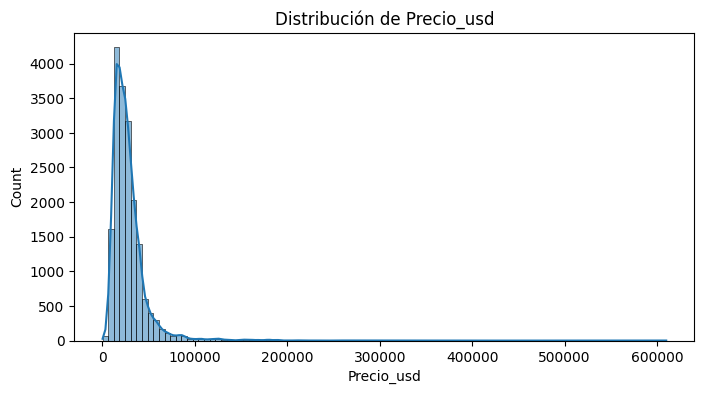

Outliers detectados: 935 filas


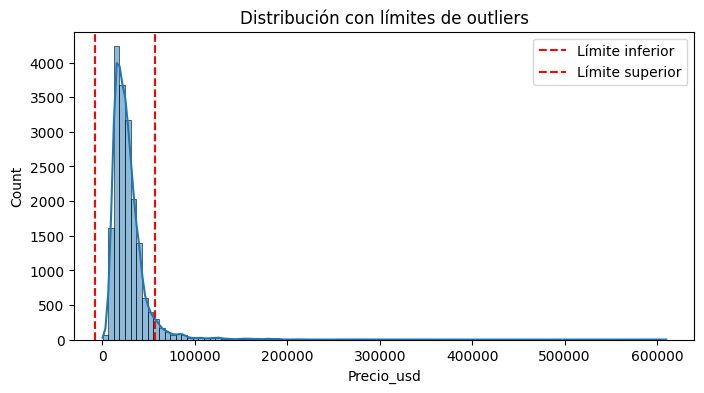

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograma del precio
plt.figure(figsize=(8, 4))
sns.histplot(df['Precio_usd'], bins=100, kde=True)
plt.title('Distribución de Precio_usd')
plt.show()


Q1 = df['Precio_usd'].quantile(0.25)
Q3 = df['Precio_usd'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Precio_usd'] < limite_inferior) | (df['Precio_usd'] > limite_superior)]

print(f"Outliers detectados: {outliers.shape[0]} filas")

plt.figure(figsize=(8, 4))
sns.histplot(df['Precio_usd'], bins=100, kde=True)
plt.axvline(limite_inferior, color='red', linestyle='--', label='Límite inferior')
plt.axvline(limite_superior, color='red', linestyle='--', label='Límite superior')
plt.title('Distribución con límites de outliers')
plt.legend()
plt.show()

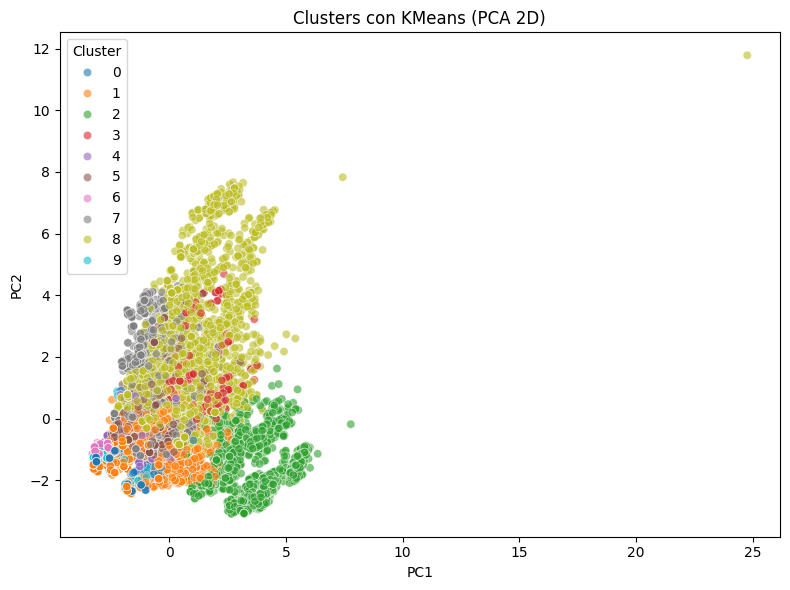

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
X = df.drop(columns=['Precio_usd'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Aplicar PCA para visualización (2 componentes)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# 5. KMeans con 4 clusters (podés cambiar n_clusters)
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Crear DataFrame para graficar
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca['Cluster'] = clusters

# 7. Graficar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='tab10', alpha=0.6)
plt.title("Clusters con KMeans (PCA 2D)")
plt.tight_layout()
plt.show()

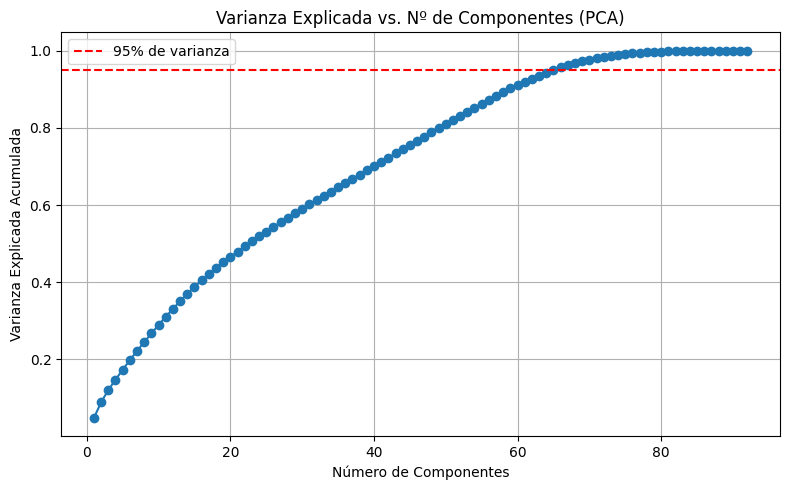

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Aplicar PCA sin limitar el número de componentes
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Calcular varianza explicada acumulada
var_exp_acum = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var_exp_acum)+1), var_exp_acum, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada vs. Nº de Componentes (PCA)')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de varianza')
plt.legend()
plt.tight_layout()
plt.show()

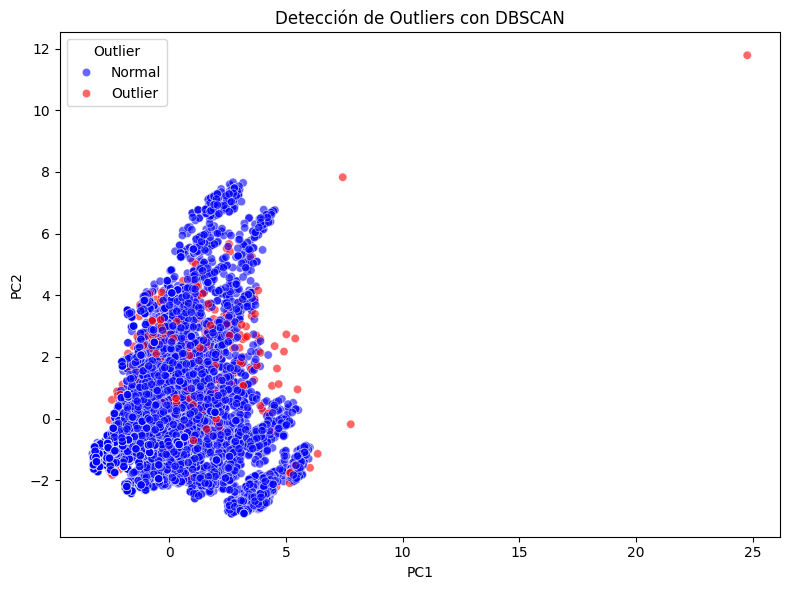

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

# 1. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. DBSCAN
db = DBSCAN(eps=4.5, min_samples=4)
labels = db.fit_predict(X_scaled)

# 3. Etiquetas binarias (0: normal, 1: outlier)
df['es_outlier'] = (labels == -1).astype(int)

# 4. Reducción de dimensión para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. graficar
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Outlier'] = df['es_outlier'].map({0: "Normal", 1: "Outlier"})

# 6. Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Outlier',
                palette={"Normal": "blue", "Outlier": "red"}, alpha=0.6)
plt.title("Detección de Outliers con DBSCAN")
plt.tight_layout()
plt.show()

In [76]:
n_outliers = (df['es_outlier'] == 1).sum()
total = len(df)
print(f"Outliers detectados: {n_outliers} de {total} ({(n_outliers / total * 100):.2f}%)")


outliers_df = df[df['es_outlier'] == 1]
outliers_df.to_csv('outliers_detectados.csv', index=False)

df.head(5)
df.to_csv("datasetintermedio.csv", index=False)
print("Dataset limpio guardado como 'datasetintermedio.csv'")


Outliers detectados: 323 de 18254 (1.77%)
Dataset limpio guardado como 'datasetintermedio.csv'


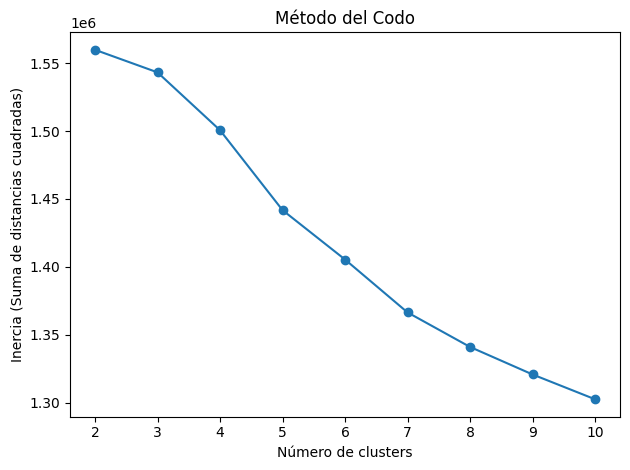

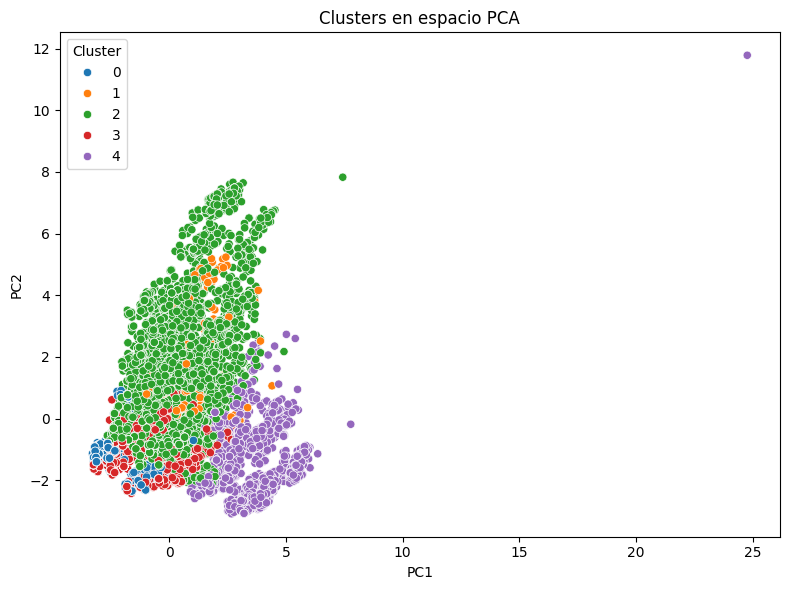

In [77]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA conservando 95% varianza
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# 3. Elegir número de clusters con el método del codo (opcional pero útil)
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia (Suma de distancias cuadradas)")
plt.title("Método del Codo")
plt.tight_layout()
plt.show()

# 4. Entrenar con el k elegido (por ejemplo 4)
kmeans_final = KMeans(n_clusters=5, random_state=42)
clusters = kmeans_final.fit_predict(X_pca)

# 5. Agregar al DataFrame original para analizar
df_con_clusters = df.copy()
df_con_clusters["cluster"] = clusters

# 6. Visualizar clusters en las dos primeras componentes
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="tab10")
plt.title("Clusters en espacio PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()